In [ ]:
import numpy as np
import matplotlib.pyplot as plt

To start, we examine a simple linear demand curve to see which price point optimizes revenue.

In [ ]:
# Define initial parameters
max_seats = 100
prices = np.arange(100, 401, 1)
linear_revenues = []
buyers_list = []

# Creating a linear demand model
def linear_demand(price):
    return max(0, 150 - 0.3 * price)

# Finding revenues for different prices under linear demand
for p in prices:
    buyers = min(max_seats, linear_demand(p)) 
    linear_revenues.append(p * buyers)
    buyers_list.append(buyers)

# Find optimal price (max revenue)
max_revenue = max(linear_revenues)
optimal_index = linear_revenues.index(max_revenue)
optimal_price = prices[optimal_index]
optimal_buyers = buyers_list[optimal_index]

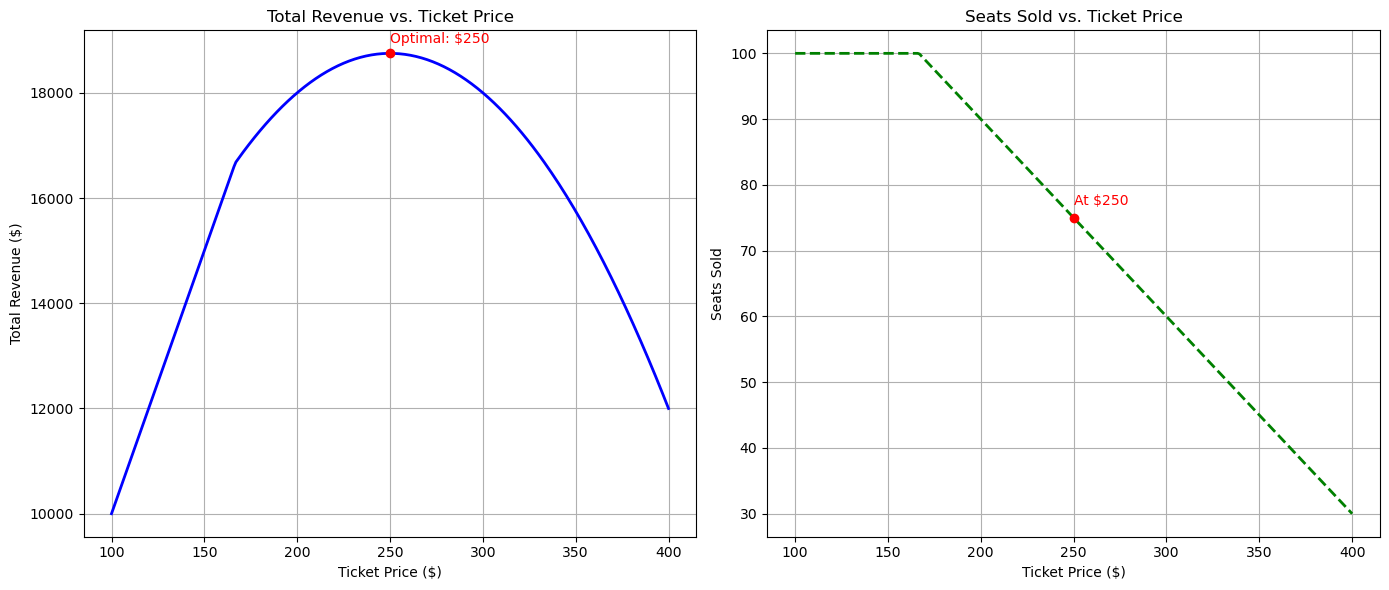

In [ ]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Revenue Plot
axs[0].plot(prices, linear_revenues, color='blue', linewidth=2)
axs[0].scatter(optimal_price, max_revenue, color='red', zorder=5)
axs[0].text(optimal_price, max_revenue + 200, f'Optimal: ${optimal_price}', color='red')
axs[0].set_title('Total Revenue vs. Ticket Price')
axs[0].set_xlabel('Ticket Price ($)')
axs[0].set_ylabel('Total Revenue ($)')
axs[0].grid(True)

# Seats Sold Plot
axs[1].plot(prices, buyers_list, color='green', linewidth=2, linestyle='--')
axs[1].scatter(optimal_price, optimal_buyers, color='red', zorder=5)
axs[1].text(optimal_price, optimal_buyers + 2, f'At ${optimal_price}', color='red')
axs[1].set_title('Seats Sold vs. Ticket Price')
axs[1].set_xlabel('Ticket Price ($)')
axs[1].set_ylabel('Seats Sold')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Now we complicate things more by using an exponential demand curve, which is more representative of a true airline ticket demand curve.

In [ ]:
# Simulating revenue under exponential demand model

a = 300  # base demand
b = 0.01  # price sensitivity

def exponential_demand(price, a, b):
    return a * np.exp(-b * price)

# Defining initial parameters for exponential model
exp_revenues = []
exp_buyers_list = []
prices = np.arange(100, 401, 1)

# Calculate revenue and capped demand
for p in prices:
    buyers = min(max_seats, exponential_demand(p, a, b))  # cap at seat capacity
    revenue = p * buyers
    exp_buyers_list.append(buyers)
    exp_revenues.append(revenue)

# Find optimal price
max_revenue = max(exp_revenues)
optimal_index = exp_revenues.index(max_revenue)
optimal_price = prices[optimal_index]
optimal_buyers = buyers_list[optimal_index]

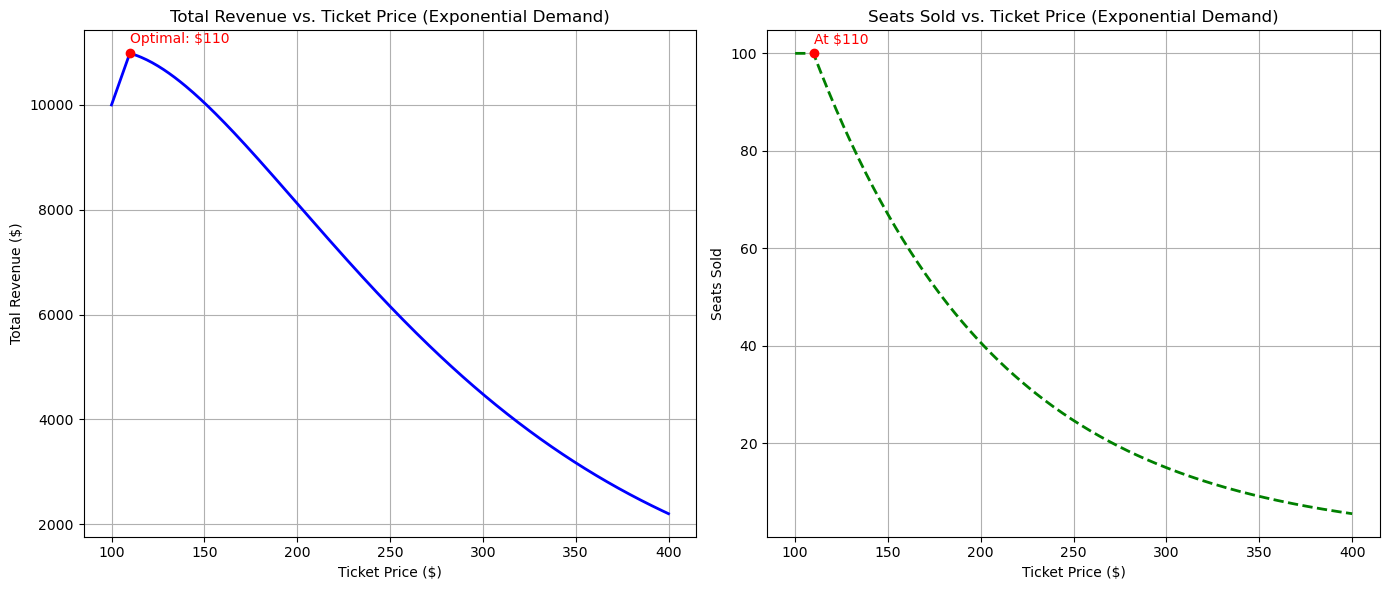

In [ ]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Revenue Plot
axs[0].plot(prices, exp_revenues, color='blue', linewidth=2)
axs[0].scatter(optimal_price, max_revenue, color='red', zorder=5)
axs[0].text(optimal_price, max_revenue + 200, f'Optimal: ${optimal_price}', color='red')
axs[0].set_title('Total Revenue vs. Ticket Price (Exponential Demand)')
axs[0].set_xlabel('Ticket Price ($)')
axs[0].set_ylabel('Total Revenue ($)')
axs[0].grid(True)

# Seats Sold Plot
axs[1].plot(prices, exp_buyers_list, color='green', linewidth=2, linestyle='--')
axs[1].scatter(optimal_price, optimal_buyers, color='red', zorder=5)
axs[1].text(optimal_price, optimal_buyers + 2, f'At ${optimal_price}', color='red')
axs[1].set_title('Seats Sold vs. Ticket Price (Exponential Demand)')
axs[1].set_xlabel('Ticket Price ($)')
axs[1].set_ylabel('Seats Sold')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Next, we examine how revenue can be determined when there are different seat types with different prices and demands. We assume that early bookers are more sensitive to prices, while later bookers are less sensitive. This idea is captured in the simple linear demand curves for each seat type. Each day, we run a simple Bernoulli trial to see if a ticket is purchased in a certain price 

In [ ]:
# Simulating multiple different seat types with different demand curves

# Assume early bookers are more price sensitive, looking for cheaper tickets,
# while last-minute bookers are less price sensitive, willing to pay more

# Simulation parameters
days_to_departure = 30
fare_buckets = [
    {"label": "Economy Basic", "price": 150, "capacity": 40, "demand_curve": lambda d: max(0, 0.9 - 0.03 * d)},
    {"label": "Economy Flex",  "price": 200, "capacity": 30, "demand_curve": lambda d: max(0, 0.4 + 0.01 * d)},
    {"label": "Premium",       "price": 300, "capacity": 20, "demand_curve": lambda d: max(0, 0.2 + 0.02 * d)},
    {"label": "Business",      "price": 400, "capacity": 10, "demand_curve": lambda d: max(0, 0.05 + 0.03 * d)}
]

# Tracking
sales_tracker = {b["label"]: 0 for b in fare_buckets}
revenue_tracker = {b["label"]: 0 for b in fare_buckets}
daily_revenue = []

# Simulate each day
for day in range(days_to_departure):
    day_revenue = 0
    for bucket in fare_buckets:
        label = bucket["label"]
        if sales_tracker[label] >= bucket["capacity"]:
            continue  # sold out

        # Simulate if a customer buys today (simple Bernoulli trial)
        demand_prob = bucket["demand_curve"](day)
        if np.random.rand() < demand_prob:
            # Sell one seat
            sales_tracker[label] += 1
            revenue_tracker[label] += bucket["price"]
            day_revenue += bucket["price"]
    daily_revenue.append(day_revenue)

# Final revenue and seats sold
total_revenue = sum(revenue_tracker.values())
print(f"Total revenue: ${total_revenue}")
print(f"Total seats sold: {sum(sales_tracker.values())}")

Total revenue: $14100
Total seats sold: 57


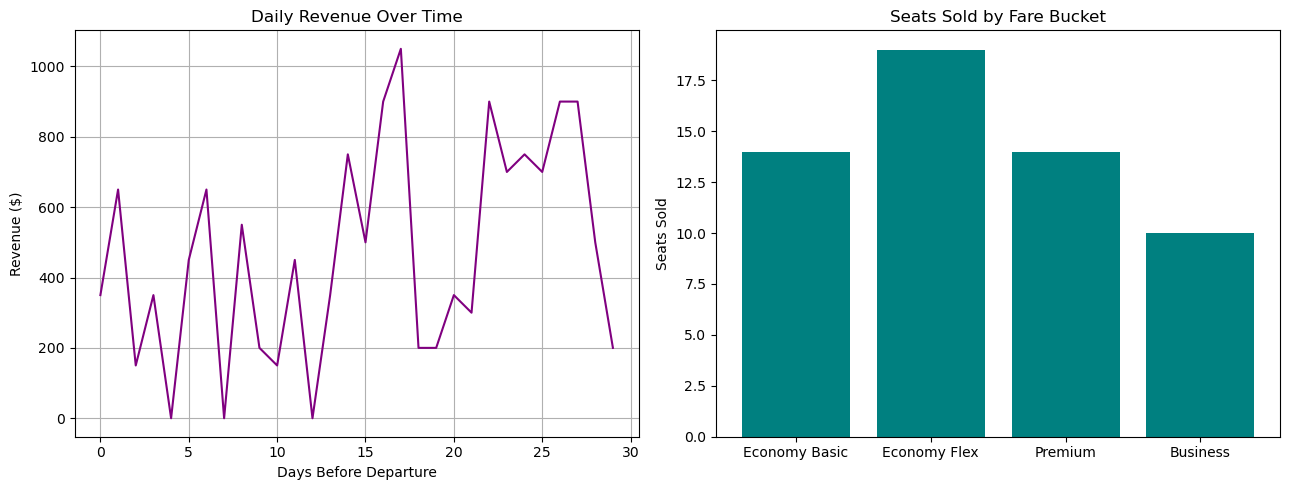

In [ ]:
# Plottting
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# Daily revenue
axs[0].plot(range(days_to_departure), daily_revenue, color='purple')
axs[0].set_title('Daily Revenue Over Time')
axs[0].set_xlabel('Days Before Departure')
axs[0].set_ylabel('Revenue ($)')
axs[0].grid(True)

# Seats sold by fare bucket
labels = list(sales_tracker.keys())
sales = list(sales_tracker.values())
axs[1].bar(labels, sales, color='teal')
axs[1].set_title('Seats Sold by Fare Bucket')
axs[1].set_ylabel('Seats Sold')

plt.tight_layout()
plt.show()

Now we run a simulation where prices of all tickets increase 10% every five days for the thirty days leading up to the flight. A given customer buys a ticket in a given fare bucket based on a simple Bernoulli trial dependent on the demand for that ticket. If tickets in a given fare bucket sell out, the customer then buys the next level up.

In [ ]:
# Simulation parameters
days_to_departure = 30

# Initial bucket setup
base_fare_buckets = [
    {"label": "Economy Basic", "base_price": 150, "capacity": 40, "demand_curve": lambda d: max(0, 0.9 - 0.03 * d)},
    {"label": "Economy Flex",  "base_price": 200, "capacity": 30, "demand_curve": lambda d: max(0, 0.4 + 0.01 * d)},
    {"label": "Premium",       "base_price": 300, "capacity": 20, "demand_curve": lambda d: max(0, 0.2 + 0.02 * d)},
    {"label": "Business",      "base_price": 400, "capacity": 10, "demand_curve": lambda d: max(0, 0.05 + 0.03 * d)}
]

# Copy and add tracking fields
fare_buckets = []
for bucket in base_fare_buckets:
    bucket_copy = bucket.copy()
    bucket_copy["sold"] = 0
    bucket_copy["revenue"] = 0
    fare_buckets.append(bucket_copy)

daily_revenue = []

# Simulation loop
for day in range(days_to_departure):
    day_revenue = 0

    for i, bucket in enumerate(fare_buckets):
        if bucket["sold"] >= bucket["capacity"]:
            continue  # bucket sold out

        # Simulate customer booking
        if np.random.rand() < bucket["demand_curve"](day):
            # Calculate dynamic price (+10% every 5 days)
            dynamic_price = bucket["base_price"] * (1 + 0.1 * (day // 5))

            if bucket["sold"] < bucket["capacity"]:
                # Sell in current bucket
                bucket["sold"] += 1
                bucket["revenue"] += dynamic_price
                day_revenue += dynamic_price
            else:
                # Reallocate to next available bucket
                for j in range(i + 1, len(fare_buckets)):
                    next_bucket = fare_buckets[j]
                    if next_bucket["sold"] < next_bucket["capacity"]:
                        new_price = next_bucket["base_price"] * (1 + 0.01 * (day // 5))
                        next_bucket["sold"] += 1
                        next_bucket["revenue"] += new_price
                        day_revenue += new_price
                        break  # allocation done
    daily_revenue.append(day_revenue)

# Final Results
total_revenue = sum(bucket["revenue"] for bucket in fare_buckets)
print(f"Total Revenue: ${total_revenue:.2f}")
print("Seats Sold by Fare Bucket:")
for bucket in fare_buckets:
    print(f"{bucket['label']}: {bucket['sold']} seats, ${bucket['revenue']:.2f}")

Total Revenue: $15180.00
Seats Sold by Fare Bucket:
Economy Basic: 15 seats, $2580.00
Economy Flex: 12 seats, $3220.00
Premium: 13 seats, $5220.00
Business: 8 seats, $4160.00


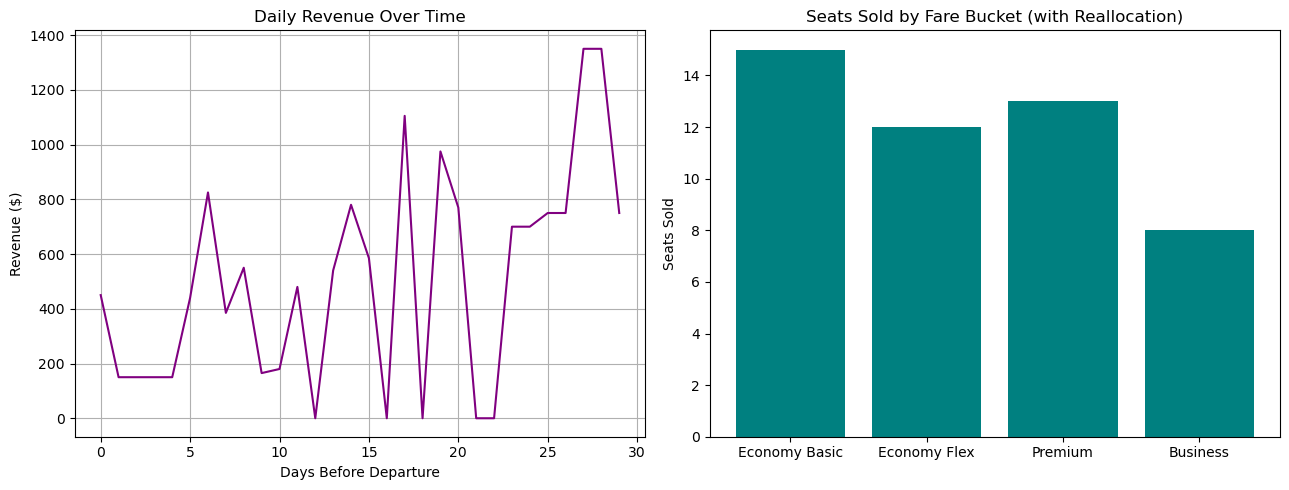

In [ ]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# Daily Revenue
axs[0].plot(range(days_to_departure), daily_revenue, color='purple')
axs[0].set_title('Daily Revenue Over Time')
axs[0].set_xlabel('Days Before Departure')
axs[0].set_ylabel('Revenue ($)')
axs[0].grid(True)

# Final Seat Sales
labels = [b["label"] for b in fare_buckets]
sales = [b["sold"] for b in fare_buckets]
axs[1].bar(labels, sales, color='teal')
axs[1].set_title('Seats Sold by Fare Bucket (with Reallocation)')
axs[1].set_ylabel('Seats Sold')

plt.tight_layout()
plt.show()

We expand on the results above by running a Monte Carlo simulation over many of these different booking scenarios, with prices in each bucket increasing linearly with time, to determine an expected revenue under the given assumptions, as well as an estimate for the standard deviation for the revenues.

In [ ]:
# Parameters
days_to_departure = 30
num_trials = 1000

base_fare_buckets = [
    {"label": "Economy Basic", "base_price": 150, "capacity": 40, "demand_curve": lambda d: max(0, 0.9 - 0.03 * d)},
    {"label": "Economy Flex",  "base_price": 200, "capacity": 30, "demand_curve": lambda d: max(0, 0.4 + 0.01 * d)},
    {"label": "Premium",       "base_price": 300, "capacity": 20, "demand_curve": lambda d: max(0, 0.2 + 0.02 * d)},
    {"label": "Business",      "base_price": 400, "capacity": 10, "demand_curve": lambda d: max(0, 0.05 + 0.03 * d)}
]

# Monte Carlo Function
def run_simulation():
    fare_buckets = []
    for b in base_fare_buckets:
        b_copy = b.copy()
        b_copy["sold"] = 0
        b_copy["revenue"] = 0
        fare_buckets.append(b_copy)

    total_revenue = 0

    for day in range(days_to_departure):
        for i, bucket in enumerate(fare_buckets):
            if np.random.rand() < bucket["demand_curve"](day):
                # Compute dynamic price
                dynamic_price = bucket["base_price"] * (1 + 0.01 * (day // 5))

                if bucket["sold"] < bucket["capacity"]:
                    bucket["sold"] += 1
                    bucket["revenue"] += dynamic_price
                else:
                    # Try to reallocate to higher bucket
                    for j in range(i + 1, len(fare_buckets)):
                        next_bucket = fare_buckets[j]
                        if next_bucket["sold"] < next_bucket["capacity"]:
                            new_price = next_bucket["base_price"] * (1 + 0.01 * (day // 5))
                            next_bucket["sold"] += 1
                            next_bucket["revenue"] += new_price
                            break
    total_revenue = sum(b["revenue"] for b in fare_buckets)
    return total_revenue

# Run Simulation
revenues = [run_simulation() for _ in range(num_trials)]

# Results
mean_revenue = np.mean(revenues)
median_revenue = np.median(revenues)
std_dev = np.std(revenues)

print(f"Expected Revenue (mean): ${mean_revenue:.2f}")
print(f"Median Revenue: ${median_revenue:.2f}")
print(f"Standard Deviation: ${std_dev:.2f}")

Expected Revenue (mean): $14125.76
Median Revenue: $14128.75
Standard Deviation: $1012.48


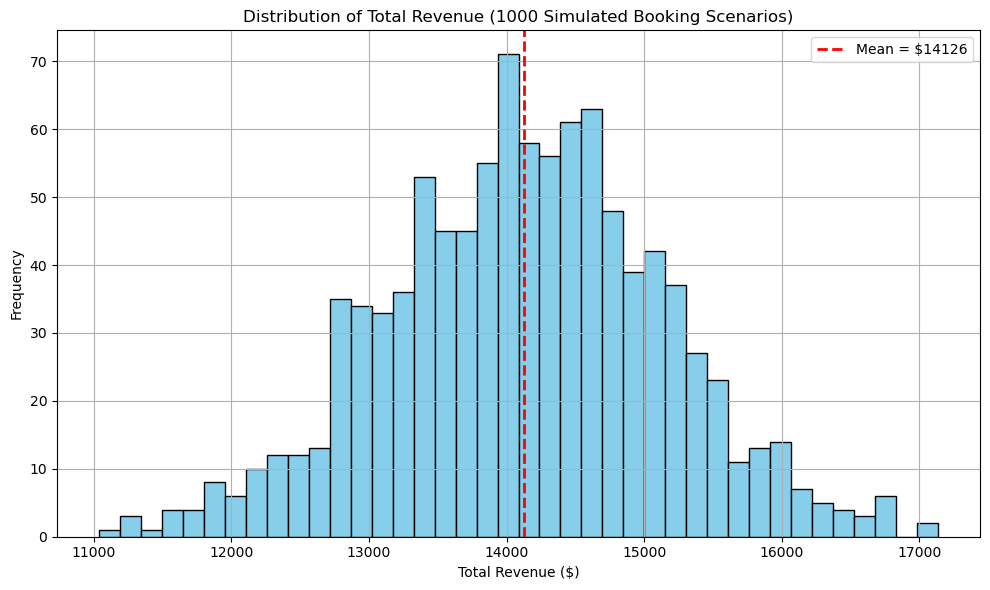

In [ ]:
# Plot Distribution
plt.figure(figsize=(10, 6))
plt.hist(revenues, bins=40, color='skyblue', edgecolor='black')
plt.axvline(mean_revenue, color='red', linestyle='dashed', linewidth=2, label=f"Mean = ${mean_revenue:.0f}")
plt.title("Distribution of Total Revenue (1000 Simulated Booking Scenarios)")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()